In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [2]:
df_car = pd.read_csv('Car_Prices.csv')

In [3]:
df_car.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [4]:
df_car.shape

(4340, 8)

In [5]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df_car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df_car['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [8]:
df_car['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [9]:
df_car['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [10]:
df_car['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [11]:
df_car['name'].nunique()

1491

In [12]:
df_car.duplicated().sum()

763

In [13]:
df_car.drop_duplicates(keep=False, inplace=True)

In [14]:
df_car.shape

(3051, 8)

## Exploratory Data Analysis

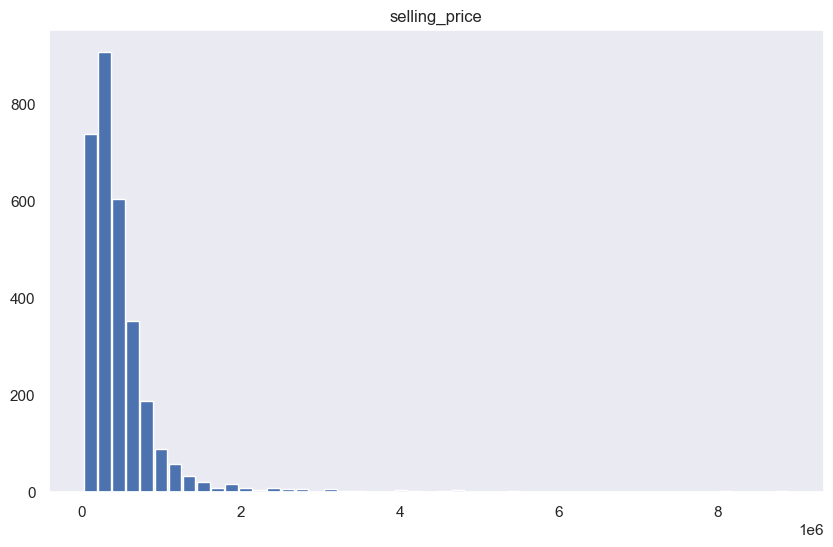

In [15]:
df_car.hist(column='selling_price', bins=50, grid=False, figsize=(10,6),rwidth=0.9)
plt.show()

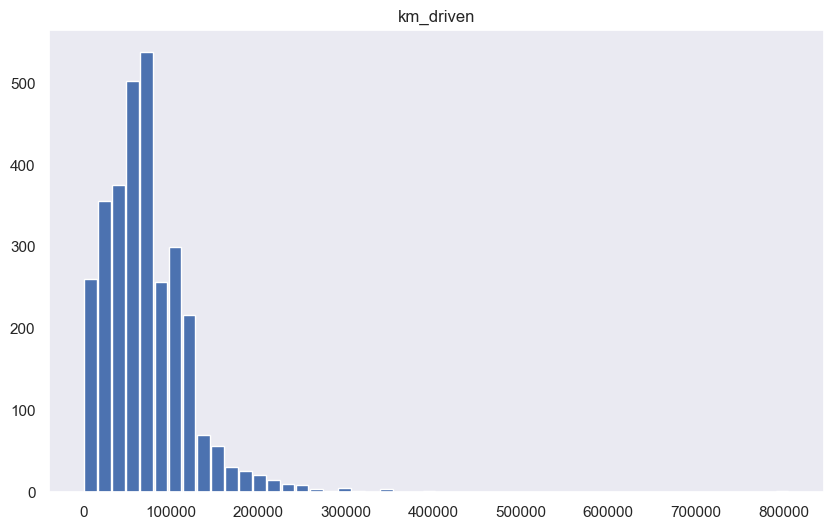

In [16]:
df_car.hist(column='km_driven', bins=50, grid=False, figsize=(10,6),rwidth=0.9)
plt.show()

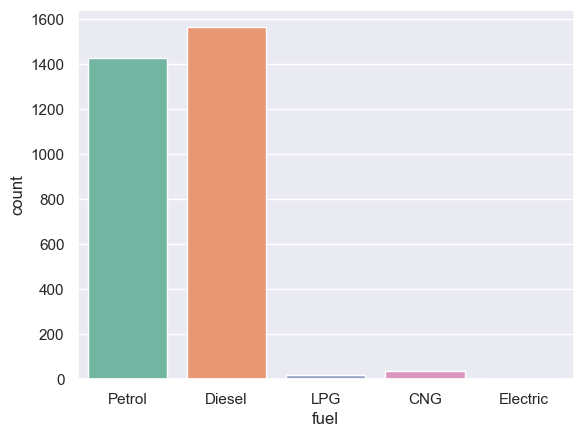

In [17]:
sns.countplot(x ='fuel', data = df_car, palette = "Set2")
plt.show()

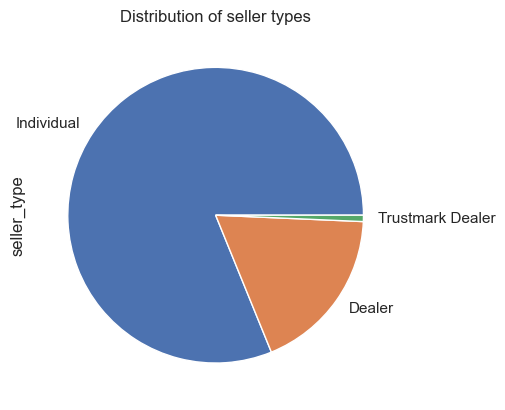

In [18]:
df_car['seller_type'].value_counts().plot(kind='pie') 
plt.title("Distribution of seller types")
plt.show()

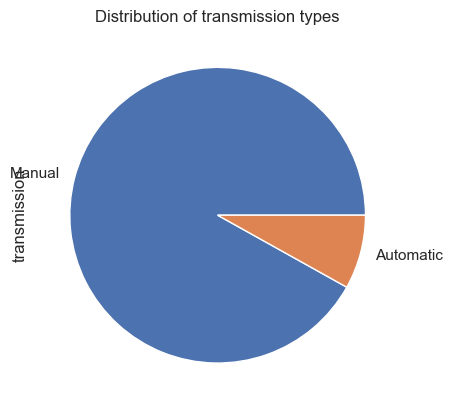

In [19]:
df_car['transmission'].value_counts().plot(kind='pie') 
plt.title("Distribution of transmission types")
plt.show()

<Axes: xlabel='owner', ylabel='count'>

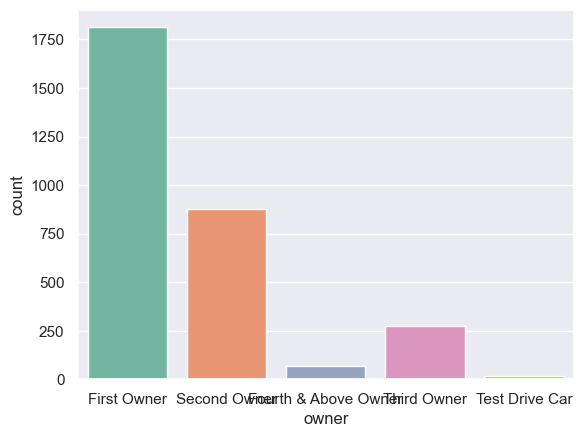

In [20]:
sns.countplot(x ='owner', data = df_car, palette = "Set2")

### Bivariate Analysis

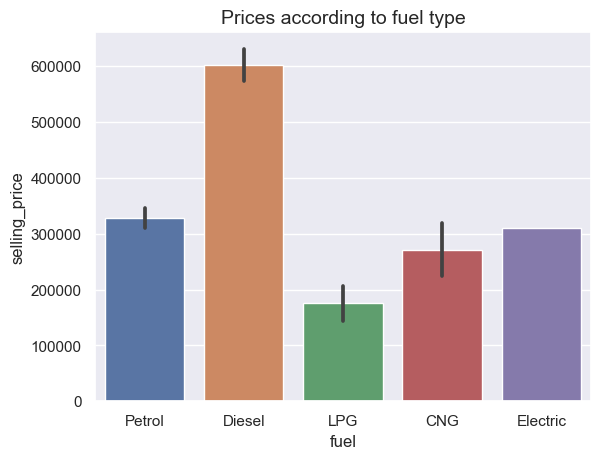

In [21]:
## Prices of car according to fuel type!!
sns.barplot(x='fuel', y='selling_price', data=df_car)
plt.title("Prices according to fuel type", size=14)
plt.show()

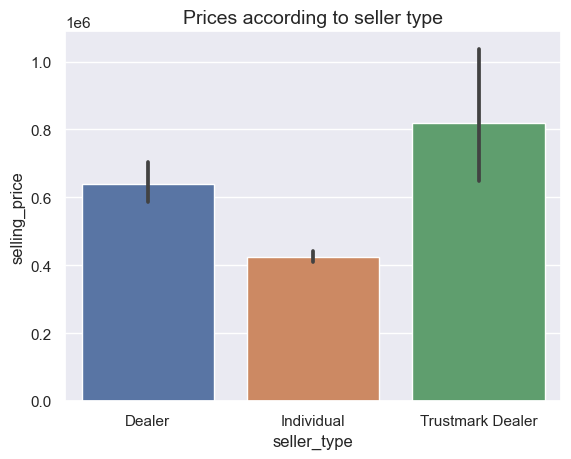

In [22]:
## Prices of car according to seller type!!
sns.barplot(x='seller_type', y='selling_price', data=df_car)
plt.title("Prices according to seller type", size=14)
plt.show()

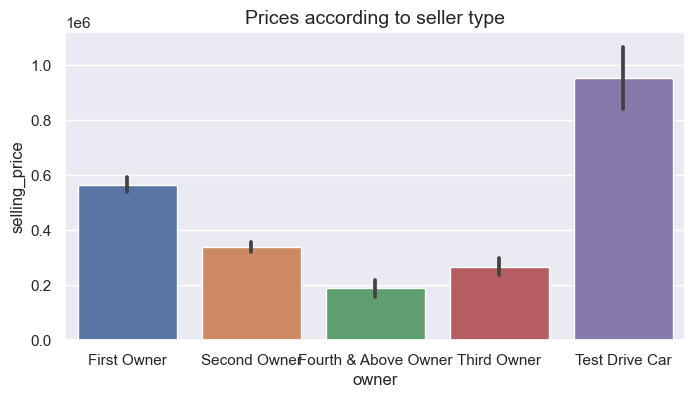

In [23]:
## Prices of car according to owners!!
plt.figure(figsize=(8, 4))
sns.barplot(x='owner', y='selling_price', data=df_car)
plt.title("Prices according to seller type", size=14)
plt.show()

<Figure size 1500x1200 with 0 Axes>

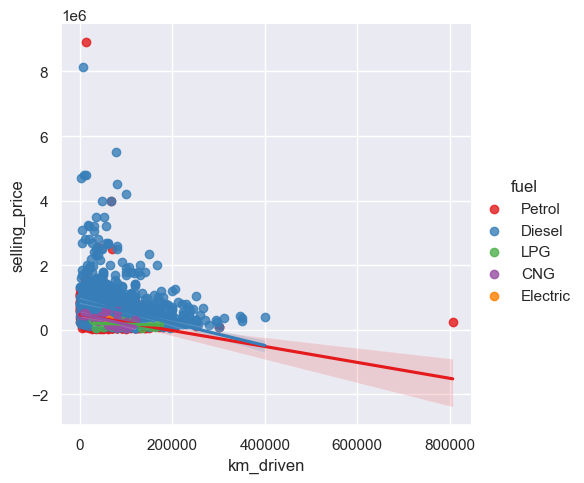

In [24]:
plt.figure(figsize=(15, 12))
sns.lmplot(x = 'km_driven', y = 'selling_price', hue= "fuel", data=df_car, palette='Set1')
plt.show()

Text(0.5, 0, 'Year')

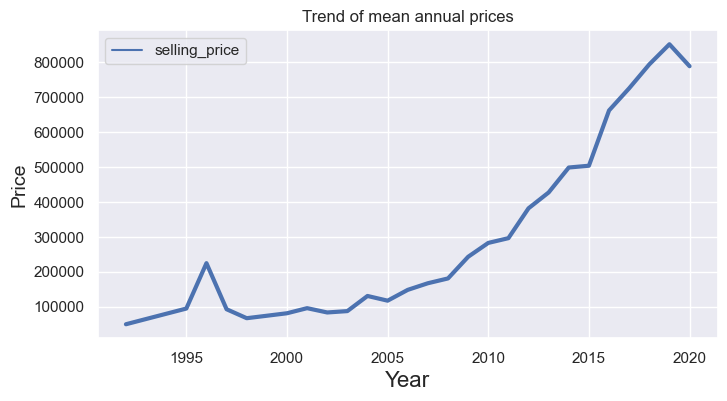

In [25]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_car.groupby(['year'])[['selling_price']].mean(), linewidth=3.0)
plt.title("Trend of mean annual prices", fontsize=12)
plt.ylabel("Price", size=14)
plt.xlabel("Year", size=16)

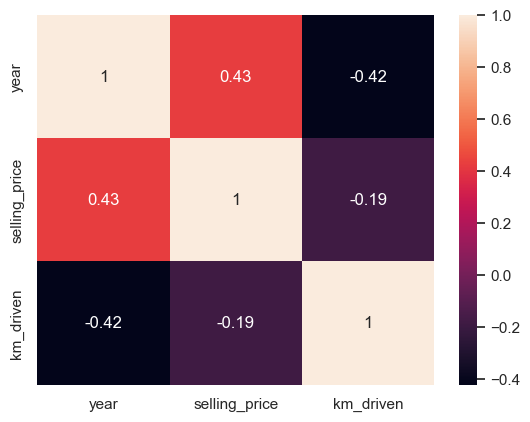

In [26]:
sns.heatmap(df_car.corr(),annot=True)
plt.show()

# Checking for outliers

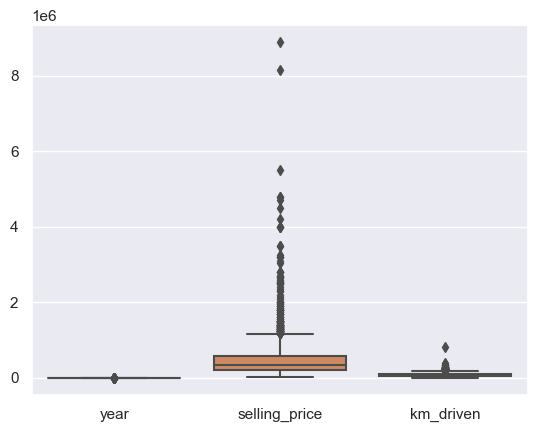

In [27]:
sns.boxplot(df_car)
plt.show()

In [28]:
for i in ['selling_price', 'km_driven']:
    percentile25 = df_car[i].quantile(0.25)
    percentile75 = df_car[i].quantile(0.75)

    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    df_car.loc[df_car[i] < lower_limit,i] = np.nan
    df_car.loc[df_car[i] > upper_limit,i] = np.nan

In [29]:
df_car.isnull().sum()

name               0
year               0
selling_price    155
km_driven         81
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64

In [30]:
df_car.dropna(inplace= True)

In [31]:
df_car.shape

(2817, 8)

## Data Preprocessing

In [32]:
brand_list=[]
for i in df_car['name']:
    sp=i.split(" ")
    brand_list.append(sp[0])

In [33]:
df_car['brand']=brand_list

In [34]:
df_car.reset_index(inplace = True, drop=True)

In [35]:
df_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti Ciaz VXi Plus,2015,585000.0,24000.0,Petrol,Dealer,Manual,First Owner,Maruti
1,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,390000.0,33000.0,Diesel,Individual,Manual,Second Owner,Chevrolet
2,Maruti Vitara Brezza ZDi Plus AMT,2018,975000.0,4500.0,Diesel,Dealer,Automatic,First Owner,Maruti
3,Honda City V MT,2018,930000.0,14500.0,Petrol,Dealer,Manual,First Owner,Honda
4,Tata Tigor 1.2 Revotron XT,2018,525000.0,15000.0,Petrol,Individual,Manual,First Owner,Tata


In [36]:
brand_count=(df_car['brand'].value_counts())/len(df_car)*100
brand_count[0:8]

Maruti       32.658857
Hyundai      17.855875
Mahindra      8.839191
Tata          8.661697
Ford          6.744764
Honda         6.318779
Chevrolet     4.366347
Toyota        3.372382
Name: brand, dtype: float64

In [37]:
for i in df_car.brand:
    if i not in ['Maruti','Hyundai','Mahindra','Tata','Ford','Honda','Toyota','Chevrolet']:
        df_car['brand'].replace(i, "Others", inplace=True)


In [38]:
df_car.drop(['name'], axis=1, inplace= True)

In [39]:
df_car.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2015,585000.0,24000.0,Petrol,Dealer,Manual,First Owner,Maruti
1,2013,390000.0,33000.0,Diesel,Individual,Manual,Second Owner,Chevrolet
2,2018,975000.0,4500.0,Diesel,Dealer,Automatic,First Owner,Maruti
3,2018,930000.0,14500.0,Petrol,Dealer,Manual,First Owner,Honda
4,2018,525000.0,15000.0,Petrol,Individual,Manual,First Owner,Tata
5,2011,450000.0,130400.0,Diesel,Dealer,Automatic,Second Owner,Others
6,2016,900000.0,50000.0,Petrol,Individual,Automatic,First Owner,Toyota
7,2010,850000.0,119000.0,Petrol,Dealer,Automatic,First Owner,Others
8,2014,229999.0,60000.0,Petrol,Individual,Manual,Fourth & Above Owner,Hyundai
9,2012,625000.0,40000.0,Diesel,Individual,Manual,First Owner,Hyundai


In [40]:
df_car.tail()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
2812,2014,409999.0,80000.0,Diesel,Individual,Manual,Second Owner,Hyundai
2813,2014,409999.0,80000.0,Diesel,Individual,Manual,Second Owner,Hyundai
2814,2009,110000.0,83000.0,Petrol,Individual,Manual,Second Owner,Maruti
2815,2016,865000.0,90000.0,Diesel,Individual,Manual,First Owner,Hyundai
2816,2016,225000.0,40000.0,Petrol,Individual,Manual,First Owner,Others


In [41]:
df_car_feature=df_car.drop(["selling_price"], axis=1)
df_car_target=df_car['selling_price']

In [42]:
df_car_feature

,year,km_driven,fuel,seller_type,transmission,owner,brand
0,2015,24000.0,Petrol,Dealer,Manual,First Owner,Maruti
1,2013,33000.0,Diesel,Individual,Manual,Second Owner,Chevrolet
2,2018,4500.0,Diesel,Dealer,Automatic,First Owner,Maruti
3,2018,14500.0,Petrol,Dealer,Manual,First Owner,Honda
4,2018,15000.0,Petrol,Individual,Manual,First Owner,Tata
...,...,...,...,...,...,...,...
2812,2014,80000.0,Diesel,Individual,Manual,Second Owner,Hyundai
2813,2014,80000.0,Diesel,Individual,Manual,Second Owner,Hyundai
2814,2009,83000.0,Petrol,Individual,Manual,Second Owner,Maruti
2815,2016,90000.0,Diesel,Individual,Manual,First Owner,Hyundai


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_car_feature,df_car_target,test_size=0.25,random_state=1)

In [44]:
df_car['year']=2023-df_car['year']

In [45]:
x_train.shape

(2112, 7)

In [46]:
x_train.head()

,year,km_driven,fuel,seller_type,transmission,owner,brand
1698,2014,100000.0,Petrol,Individual,Manual,First Owner,Hyundai
1967,2011,80000.0,Petrol,Individual,Manual,Second Owner,Maruti
340,2013,125531.0,Diesel,Dealer,Manual,Second Owner,Ford
1138,2013,45766.0,Diesel,Individual,Manual,Second Owner,Mahindra
994,2012,40000.0,Diesel,Individual,Manual,First Owner,Chevrolet


In [47]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit(df_car_feature[['fuel','seller_type','transmission','brand']])

OneHotEncoder()

In [48]:
scale_mapper = {"First Owner":1, "Second Owner":2, "Third Owner":3, "Fourth & Above Owner": 4, "Test Drive Car": 5}
df_car_feature["owner"] = df_car_feature["owner"].replace(scale_mapper)

In [49]:
df_car_feature.head()

,year,km_driven,fuel,seller_type,transmission,owner,brand
0,2015,24000.0,Petrol,Dealer,Manual,1,Maruti
1,2013,33000.0,Diesel,Individual,Manual,2,Chevrolet
2,2018,4500.0,Diesel,Dealer,Automatic,1,Maruti
3,2018,14500.0,Petrol,Dealer,Manual,1,Honda
4,2018,15000.0,Petrol,Individual,Manual,1,Tata


In [62]:
df_car_feature['year']=2023-df_car_feature['year']

In [63]:
df_car_feature.head()

,year,km_driven,fuel,seller_type,transmission,owner,brand
0,8,24000.0,Petrol,Dealer,Manual,1,Maruti
1,10,33000.0,Diesel,Individual,Manual,2,Chevrolet
2,5,4500.0,Diesel,Dealer,Automatic,1,Maruti
3,5,14500.0,Petrol,Dealer,Manual,1,Honda
4,5,15000.0,Petrol,Individual,Manual,1,Tata


In [64]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['fuel','seller_type','transmission','brand']),
                                    remainder='passthrough')

In [65]:
x_train,x_test,y_train,y_test = train_test_split(df_car_feature,df_car_target,test_size=0.25,random_state=1)

In [66]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object),
                                                                            array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                                                            array(['Chevrolet', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Others', 'Tata', 'Toyota'], dtype=object)]),
                                                  ['fuel', 'seller_type',
                                                   'transmission',
                                                   'brand'])])),
                ('linearregression', LinearRegression())])

In [67]:
y_pred=pipe.predict(x_test)

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5914618159890057

In [69]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(df_car_feature,df_car_target,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [70]:
np.argmax(scores)

787

In [71]:
scores[np.argmax(scores)] ## This means that specifying random_state=787 will show a r2 score of 67%!!!

0.6673618790151978

In [72]:
x_train,x_test,y_train,y_test=train_test_split(df_car_feature,df_car_target,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.6673618790151978

In [81]:
x_train,x_test,y_train,y_test=train_test_split(df_car_feature,df_car_target,test_size=0.2,random_state=np.argmax(scores))
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor()
pipe=make_pipeline(column_trans,rfr)
pipe.fit(x_train,y_train)
y_pred_rfr = pipe.predict(x_test)

from sklearn import metrics

print(metrics.r2_score(y_test, y_pred_rfr))

0.6466840377281518


In [101]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
lasso_model = linear_model.Lasso(alpha=20
                                )
pipe=make_pipeline(column_trans,lasso_model)
pipe.fit(x_train,y_train)
y_pred_lasso = pipe.predict(x_test)
print(metrics.r2_score(y_test, y_pred_lasso))

0.6674188202282467


In [103]:
!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 2.2 MB/s eta 0:00:00


In [105]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()
pipe=make_pipeline(column_trans,lgb_model)
pipe.fit(x_train,y_train)
y_pred_lgb = pipe.predict(x_test)
print(metrics.r2_score(y_test, y_pred_lgb))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 2253, number of used features: 19
[LightGBM] [Info] Start training from score 389125.349312
0.6724599045345385
